<a href="https://colab.research.google.com/github/SoulclappaCO/Mi-primera-Actividad---Sistemas-Avanzados-2025/blob/main/Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

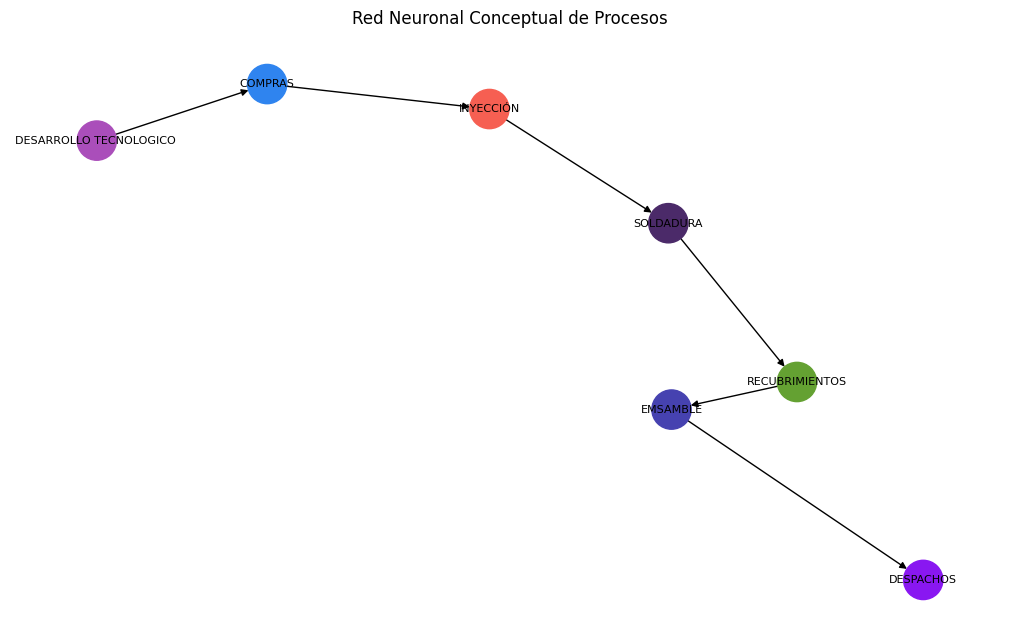

In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
import os

# Carga el archivo Excel
file_path = '/content/PROCESO FABRICACION ESCUDO.xlsx'

# Check if the file exists before trying to read it
if os.path.exists(file_path):
    # Load the Excel file, skipping initial rows. We will set the header manually later.
    df = pd.read_excel(file_path, skiprows=5)

    # Assuming the column with 'PROCESOS' is the third column (index 2), rename it.
    # We'll also drop the first row which contains the actual header values as data after skiprows.
    df.columns = df.iloc[0]
    df = df[1:].reset_index(drop=True)
    df.rename(columns={'PROCESOS': 'PROCESOS_Column'}, inplace=True)


    # Extrae los procesos from the corrected column name
    # Use the correct column name based on the loaded header
    procesos = df['PROCESOS_Column'].dropna().tolist()

    # Crea el grafo
    G = nx.DiGraph()
    for i, proceso in enumerate(procesos):
        G.add_node(proceso)
        if i > 0:
            G.add_edge(procesos[i-1], proceso)

    # Asigna colores aleatorios a los nodos
    colors = []
    for node in G.nodes():
        colors.append([random.random() for _ in range(3)])

    plt.figure(figsize=(10,6))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color=colors, node_size=800, font_size=8, edge_color='black', arrows=True)
    plt.title('Red Neuronal Conceptual de Procesos')
    plt.axis('off')
    plt.show()
else:
    print(f"Error: The file '{file_path}' was not found. Please upload the file and run the cell again.")

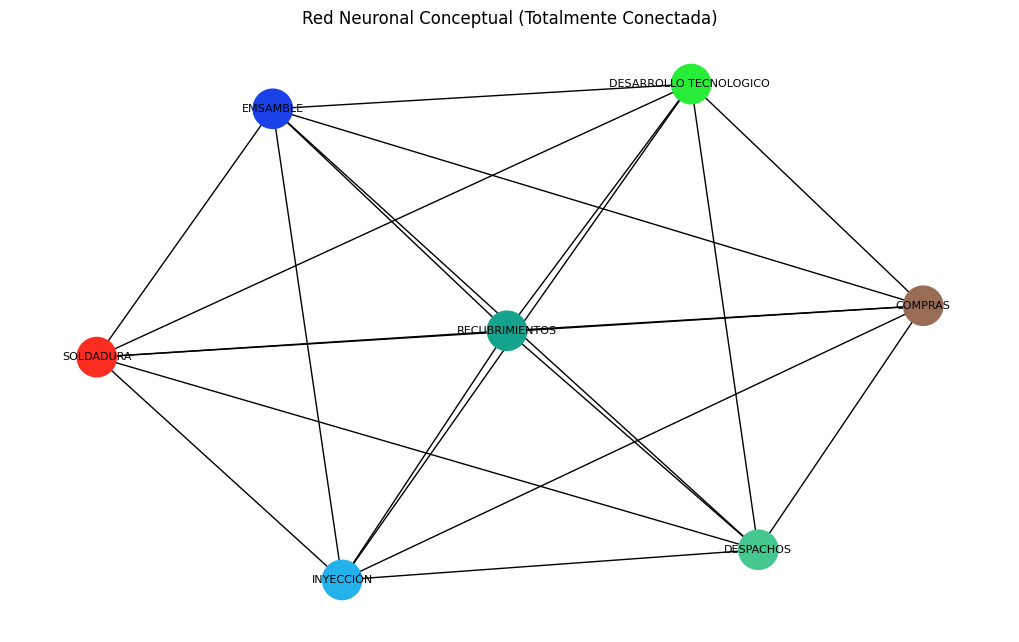

In [10]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
import os

# Carga el archivo Excel
file_path = '/content/PROCESO FABRICACION ESCUDO.xlsx'

if os.path.exists(file_path):
    df = pd.read_excel(file_path, skiprows=5)
    df.columns = df.iloc[0]
    df = df[1:].reset_index(drop=True)
    df.rename(columns={'PROCESOS': 'PROCESOS_Column'}, inplace=True)
    procesos = df['PROCESOS_Column'].dropna().tolist()

    # Crea el grafo totalmente conectado
    G = nx.Graph()
    for proceso in procesos:
        G.add_node(proceso)
    for i in range(len(procesos)):
        for j in range(i+1, len(procesos)):
            G.add_edge(procesos[i], procesos[j])

    # Colores aleatorios para los nodos
    colors = []
    for node in G.nodes():
        colors.append([random.random() for _ in range(3)])

    plt.figure(figsize=(10,6))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color=colors, node_size=800, font_size=8, edge_color='black')
    plt.title('Red Neuronal Conceptual (Totalmente Conectada)')
    plt.axis('off')
    plt.show()
else:
    print(f"Error: El archivo '{file_path}' no fue encontrado. Por favor, súbelo y ejecuta la celda nuevamente.")

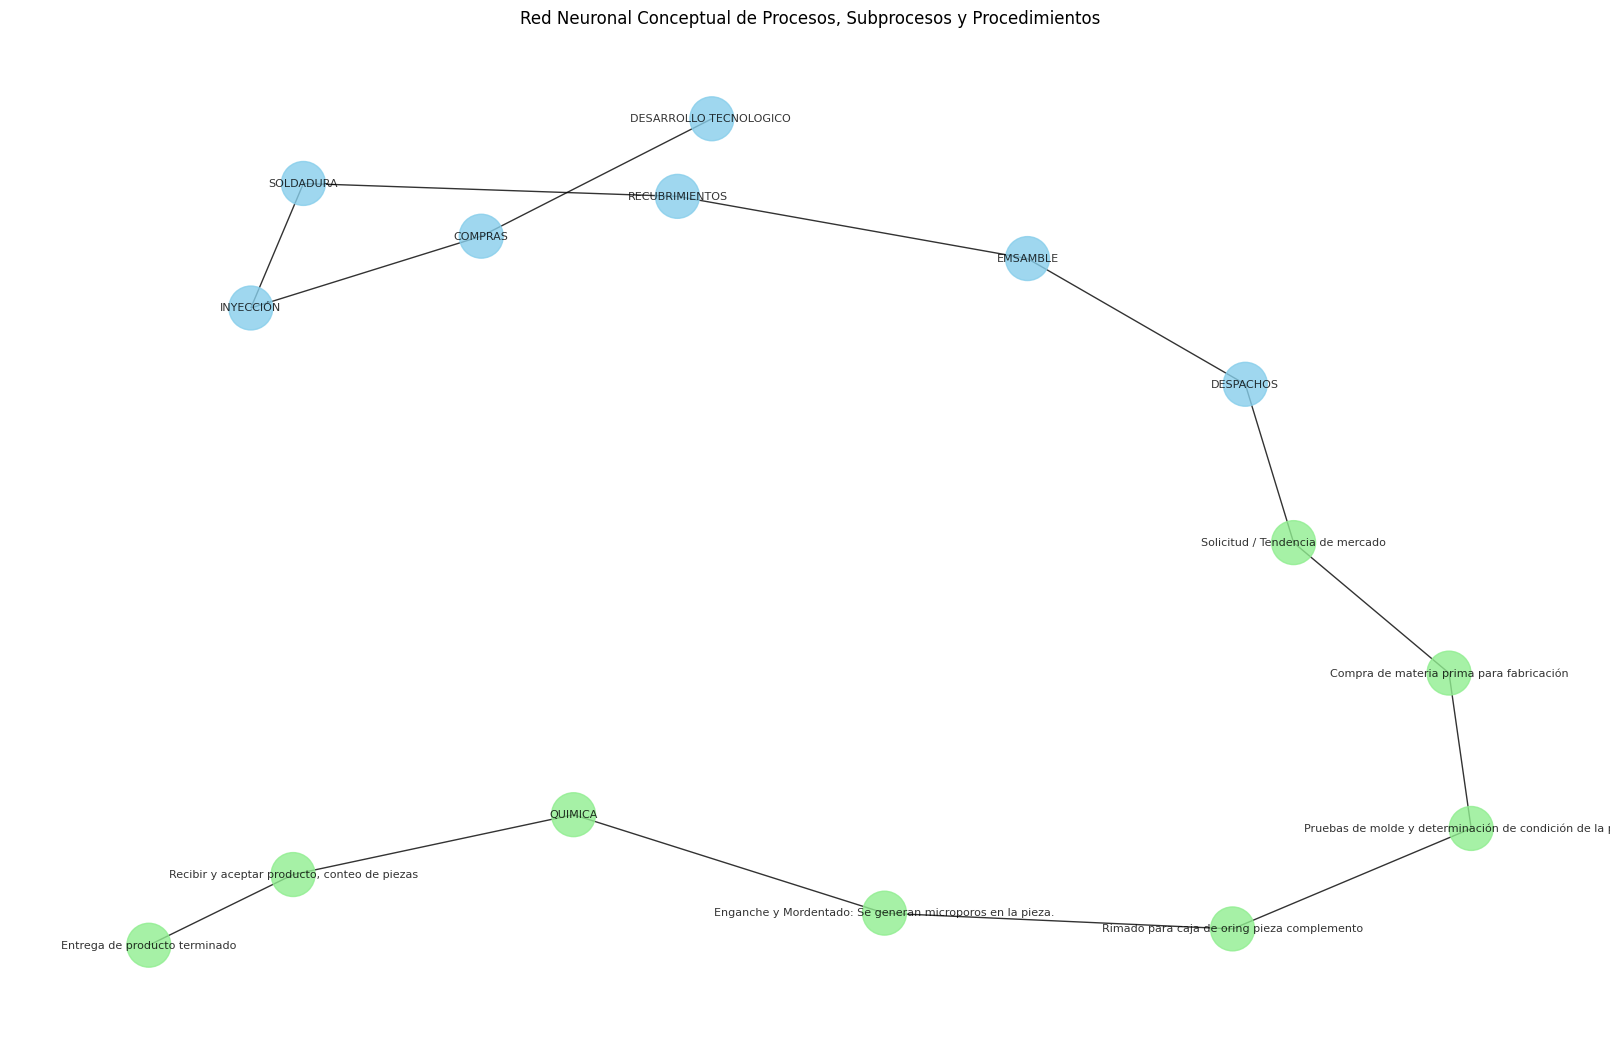

In [12]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
import re
import os

# Carga el archivo Excel
file_path = '/content/PROCESO FABRICACION ESCUDO.xlsx'

if os.path.exists(file_path):
    # Load the Excel file, skipping initial rows. We will set the header manually later.
    df = pd.read_excel(file_path, skiprows=5)

    # Assuming the column with 'PROCESOS' is the third column (index 2), rename it.
    # We'll also drop the first row which contains the actual header values as data after skiprows.
    df.columns = df.iloc[0]
    df = df[1:].reset_index(drop=True)
    df.rename(columns={'PROCESOS': 'PROCESOS_Column', 'SUBPROCESOS': 'SUBPROCESOS_Column', 'PROCEDIMIENTO (PASO A PASO)': 'PROCEDIMIENTO_Column'}, inplace=True)

    # Extract processes, subprocesses, and procedures from the relevant columns
    procesos = df['PROCESOS_Column'].dropna().tolist()
    subprocesos = df['SUBPROCESOS_Column'].dropna().tolist()
    procedimientos = df['PROCEDIMIENTO_Column'].dropna().tolist()


    # Crea el grafo
    G = nx.Graph()

    # Add nodes for processes, subprocesses, and procedures
    for proceso in procesos:
        G.add_node(proceso, tipo='proceso')
    for sub in subprocesos:
        G.add_node(sub, tipo='subproceso')
    for proc in procedimientos:
        G.add_node(proc, tipo='procedimiento')

    # Add edges based on the sequential flow (assuming they appear in order in the columns)
    # This part might need adjustment based on the actual relationships in your data
    all_items = procesos + subprocesos + procedimientos
    for i in range(len(all_items) - 1):
        G.add_edge(all_items[i], all_items[i+1])


    # Asigna colores aleatorios a los nodos
    colors = []
    node_colors = {}
    for node in G.nodes():
        # Assign different colors based on node type
        if G.nodes[node]['tipo'] == 'proceso':
            node_colors[node] = 'skyblue'
        elif G.nodes[node]['tipo'] == 'subproceso':
            node_colors[node] = 'lightgreen'
        elif G.nodes[node][ 'tipo'] == 'procedimiento':
            node_colors[node] = 'salmon'
        else:
            node_colors[node] = 'gray' # Default color

    # Create a list of colors in the same order as G.nodes()
    colors = [node_colors[node] for node in G.nodes()]


    plt.figure(figsize=(16,10))
    pos = nx.spring_layout(G, seed=42, k=0.5) # Adjust k for better spacing
    nx.draw(G, pos, with_labels=True, node_color=colors, node_size=1000, font_size=8, edge_color='black', alpha=0.8)
    plt.title('Red Neuronal Conceptual de Procesos, Subprocesos y Procedimientos')
    plt.axis('off')
    plt.show()
else:
    print(f"Error: El archivo '{file_path}' no fue encontrado. Por favor, súbelo y ejecuta la celda nuevamente.")

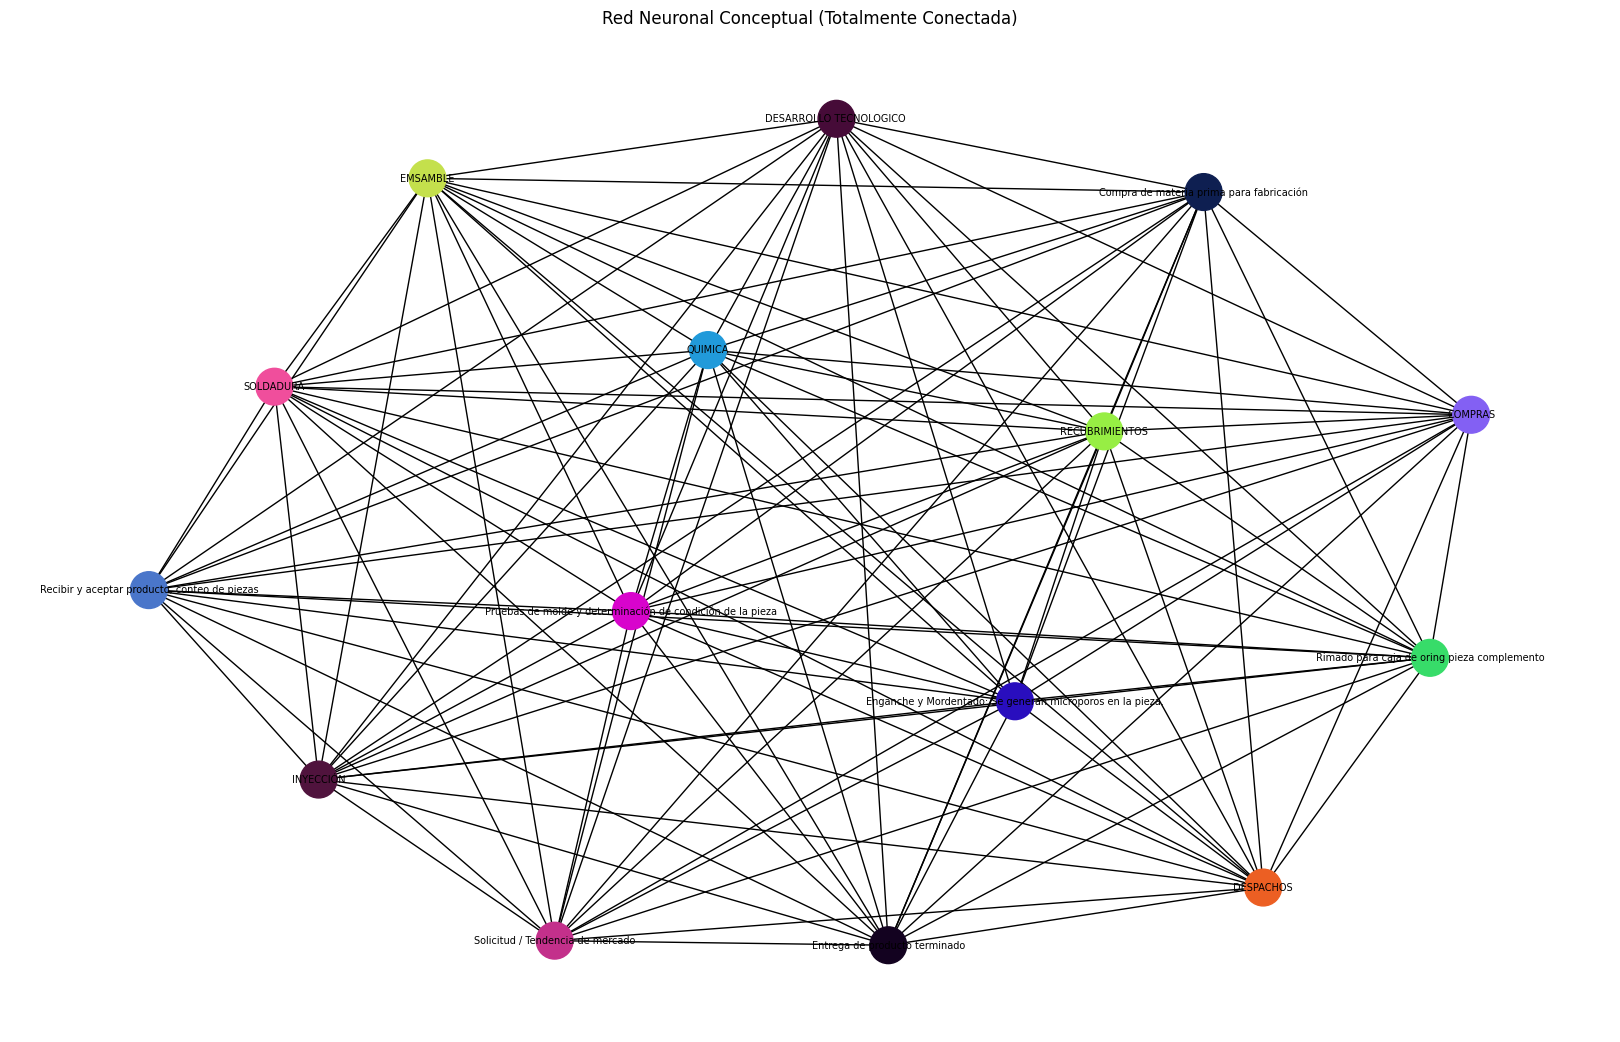

In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
import os

# Carga el archivo Excel
file_path = '/content/PROCESO FABRICACION ESCUDO.xlsx'

if os.path.exists(file_path):
    # Load the Excel file, skipping initial rows. We will set the header manually later.
    df = pd.read_excel(file_path, skiprows=5)

    # Assuming the columns for processes, subprocesses, and procedures are at specific positions.
    # Based on the structure observed in previous interactions, let's assume:
    # 'PROCESOS' is the 3rd column (index 2 after skipping rows and taking the first row as header)
    # 'SUBPROCESOS' is the 4th column (index 3)
    # 'PROCEDIMIENTO (PASO A PASO)' is the 5th column (index 4)

    # Set the header from the first row after skipping
    df.columns = df.iloc[0]
    # Drop the row that was used as header
    df = df[1:].reset_index(drop=True)

    # Rename columns for easier access, handling potential missing columns gracefully
    column_mapping = {
        'PROCESOS': 'PROCESOS_Column',
        'SUBPROCESOS': 'SUBPROCESOS_Column',
        'PROCEDIMIENTO (PASO A PASO)': 'PROCEDIMIENTO_Column'
    }
    df.rename(columns=column_mapping, inplace=True)

    # Extract nodes from the relevant columns, using the renamed columns
    # Check if columns exist before trying to access them
    procesos = df['PROCESOS_Column'].dropna().tolist() if 'PROCESOS_Column' in df.columns else []
    subprocesos = df['SUBPROCESOS_Column'].dropna().tolist() if 'SUBPROCESOS_Column' in df.columns else []
    procedimientos = df['PROCEDIMIENTO_Column'].dropna().tolist() if 'PROCEDIMIENTO_Column' in df.columns else []


    # Combine all extracted items to be used as nodes
    nodos = procesos + subprocesos + procedimientos

    # Crea el grafo totalmente conectado
    G = nx.Graph()
    for nodo in nodos:
        G.add_node(nodo)
    for i in range(len(nodos)):
        for j in range(i+1, len(nodos)):
            G.add_edge(nodos[i], nodos[j])

    # Colores aleatorios para los nodos
    colors = []
    for node in G.nodes():
        colors.append([random.random() for _ in range(3)])

    plt.figure(figsize=(16,10))
    pos = nx.spring_layout(G, seed=42, k=0.3)
    nx.draw(G, pos, with_labels=True, node_color=colors, node_size=700, font_size=7, edge_color='black')
    plt.title('Red Neuronal Conceptual (Totalmente Conectada)')
    plt.axis('off')
    plt.show()
else:
    print(f"Error: El archivo '{file_path}' no fue encontrado. Por favor, súbelo y ejecuta la celda nuevamente.")

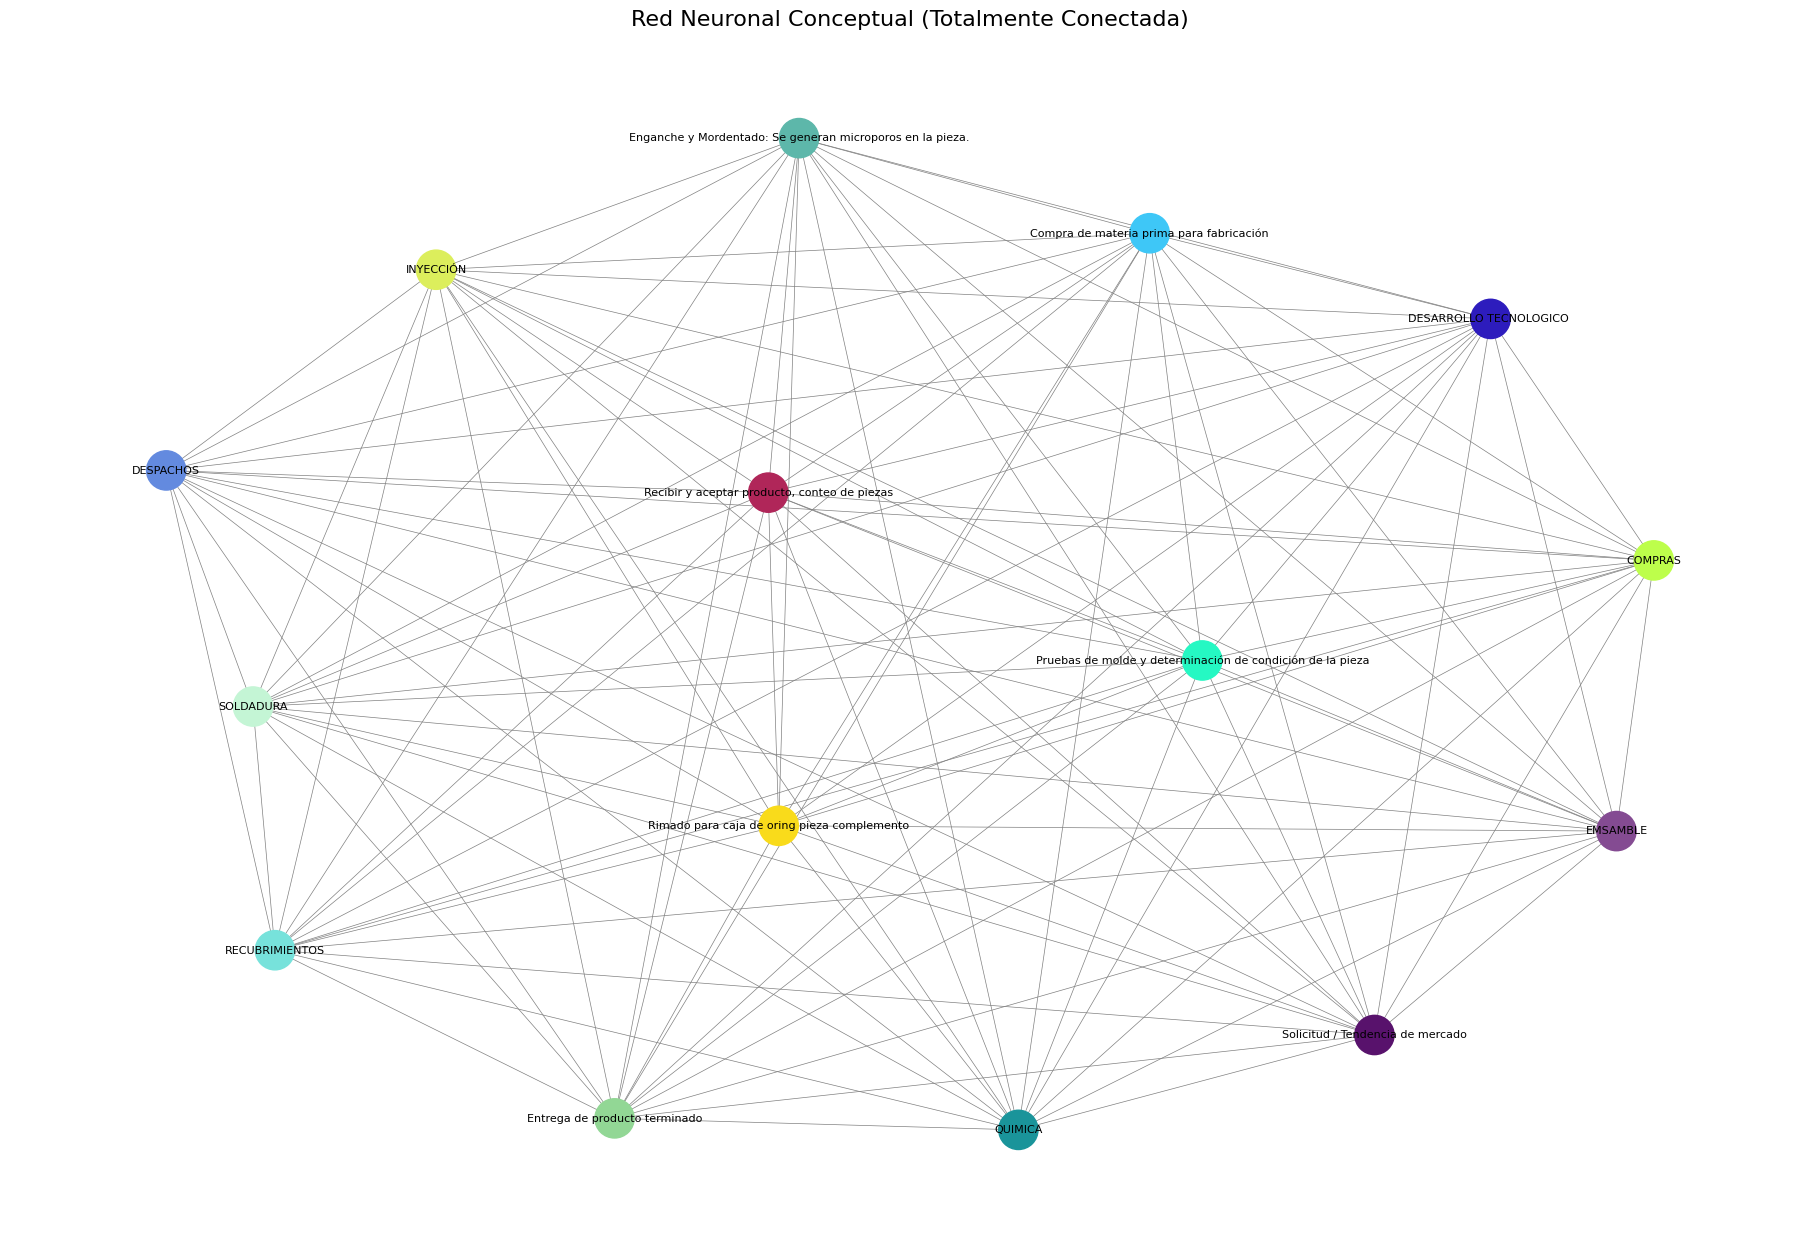

In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random

def generar_red_conceptual(file_path):
    """
    Genera y visualiza una red neuronal conceptual totalmente conectada
    a partir de un archivo Excel.

    Args:
        file_path (str): La ruta al archivo Excel.
    """
    try:
        # Intenta cargar el archivo Excel.
        # Se asume que los datos relevantes comienzan después de algunas filas de encabezado.
        # Ajusta `skiprows` si la estructura de tu archivo es diferente.
        df = pd.read_excel(file_path, skiprows=5)

        # Asigna la primera fila leída como encabezado de las columnas
        df.columns = df.iloc[0]
        df = df[1:].reset_index(drop=True)

    except FileNotFoundError:
        print(f"Error: El archivo no fue encontrado en la ruta '{file_path}'")
        return
    except Exception as e:
        print(f"Ocurrió un error al leer el archivo Excel: {e}")
        return

    # Lista de las columnas de interés
    columnas_objetivo = ["PROCESOS", "SUBPROCESOS", "PROCEDIMIENTO (PASO A PASO)"]
    nodos = []

    # Extraer los valores de cada columna y añadirlos a la lista de nodos
    for col in columnas_objetivo:
        if col in df.columns:
            # .dropna() para eliminar celdas vacías y .tolist() para convertir a lista
            nodos.extend(df[col].dropna().tolist())
        else:
            print(f"Advertencia: La columna '{col}' no se encontró en el archivo.")

    # Eliminar nodos duplicados convirtiendo la lista a un conjunto y luego de nuevo a lista
    nodos_unicos = list(set(nodos))

    if not nodos_unicos:
        print("No se encontraron datos en las columnas especificadas para generar la red.")
        return

    # Crear un grafo completo (fully connected) donde cada nodo está conectado con todos los demás
    G = nx.complete_graph(nodos_unicos)

    # --- Visualización de la Red ---

    # Generar un color aleatorio para cada nodo
    colores_nodos = ['#%06X' % random.randint(0, 0xFFFFFF) for _ in range(G.number_of_nodes())]

    # Configurar el tamaño de la figura para una mejor visualización
    plt.figure(figsize=(18, 12))

    # Calcular la disposición de los nodos usando un algoritmo de resorte (spring_layout)
    # El `seed` asegura que la disposición sea la misma cada vez que se ejecuta el código
    pos = nx.spring_layout(G, seed=42, k=0.9)

    # Dibujar la red
    nx.draw(G,
            pos,
            with_labels=True,      # Mostrar las etiquetas de los nodos
            node_color=colores_nodos, # Asignar los colores generados
            node_size=800,         # Tamaño de los nodos
            font_size=8,           # Tamaño de la fuente de las etiquetas
            font_color='black',    # Color de la fuente
            edge_color='gray',     # Color de las conexiones
            width=0.5)             # Ancho de las líneas de conexión

    # Añadir título al gráfico
    plt.title('Red Neuronal Conceptual (Totalmente Conectada)', size=16)
    plt.axis('off')  # Ocultar los ejes
    plt.show()

# --- INSTRUCCIONES DE USO ---
# 1. Asegúrate de tener las librerías necesarias instaladas:
#    pip install pandas openpyxl networkx matplotlib

# 2. Reemplaza esta ruta con la ubicación de tu archivo Excel.
ruta_del_archivo = '/content/PROCESO FABRICACION ESCUDO.xlsx'

# 3. Ejecuta la función.
generar_red_conceptual(ruta_del_archivo)